# Deep Learning Basics

At a high-level, neural networks are either encoders, decoders, or a combination of both. Encoders find patterns in raw data to form compact, useful representations. Decoders generate new data or high-resolution useful infomation from those representations. As the lecture describes, deep learning discovers ways to **represent** the world so that we can reason about it. The rest is clever methods that help use deal effectively with visual information, language, sound (#1-6) and even act in a world based on this information and occasional rewards (#7).

1. **Feed Forward Neural Networks (FFNNs)** - classification and regression based on features. See [Part 1](#Part-1:-Boston-Housing-Price-Prediction-with-Feed-Forward-Neural-Networks) of this tutorial for an example.
2. **Convolutional Neural Networks (CNNs)** - image classification, object detection, video action recognition, etc. See [Part 2](#Part-2:-Classification-of-MNIST-Dreams-with-Convolution-Neural-Networks) of this tutorial for an example.
3. **Recurrent Neural Networks (RNNs)** - language modeling, speech recognition/generation, etc. See [this TF tutorial on text generation](https://www.tensorflow.org/tutorials/sequences/text_generation) for an example.
4. **Encoder Decoder Architectures** - semantic segmentation, machine translation, etc. See [our tutorial on semantic segmentation](https://github.com/lexfridman/mit-deep-learning/blob/master/tutorial_driving_scene_segmentation/tutorial_driving_scene_segmentation.ipynb) for an example.
5. **Autoencoder** - unsupervised embeddings, denoising, etc.
6. **Generative Adversarial Networks (GANs)** - unsupervised generation of realistic images, etc. See [this TF tutorial on DCGANs](https://github.com/tensorflow/tensorflow/blob/r1.11/tensorflow/contrib/eager/python/examples/generative_examples/dcgan.ipynb) for an example.
7. **Deep Reinforcement Learning** - game playing, robotics in simulation, self-play, neural arhitecture search, etc. We'll be releasing notebooks on this soon and will link them here.

There are selective omissions and simplifications throughout these tutorials, hopefully without losing the essence of the underlying ideas. See Einstein quote...

# Prerequisites:

![Einstein](https://i.imgur.com/vfPDHGN.png)

[tf.keras](https://www.tensorflow.org/guide/keras) is the simplest way to build and train neural network models in TensorFlow. So, that's what we'll stick with in this tutorial, unless the models neccessitate a lower-level API.

Note that there's [tf.keras](https://www.tensorflow.org/guide/keras) (comes with TensorFlow) and there's [Keras](https://keras.io/) (standalone). You should be using [tf.keras](https://www.tensorflow.org/guide/keras) because (1) it comes with TensorFlow so you don't need to install anything extra and (2) it comes with powerful TensorFlow-specific features.

### Importing libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from keras.utils import np_utils
import pylab as plt
# model_from_json ---json dump and pick from json

#### Keras is the deep learning library that helps you to code Deep Neural Networks with fewer lines of code 

The MNIST dataset containss 70,000 grayscale images of handwritten digits at a resolution of 28 by 28 pixels. The task is to take one of these images as input and predict the most likely digit contained in the image (along with a relative confidence in this prediction):

<img src="https://i.imgur.com/ITrm9x4.png" width="500px">

Now, we load the dataset. The images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. The *labels* are an array of integers, ranging from 0 to 9.

We scale these values to a range of 0 to 1 before feeding to the neural network model. For this, we divide the values by 255. It's important that the training set and the testing set are preprocessed in the same way:

### Import data

In [ ]:
batch_size = 128
num_classes = 10
# iteratively giving your data to your model is epochs
# How many times you are feeding data to your model
epochs = 2

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test)= mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
print(y_train[0])

11490434/11490434 [==============================] - 1s 0us/step
60000 train samples
10000 test samples
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

### Visualize Data

Label: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


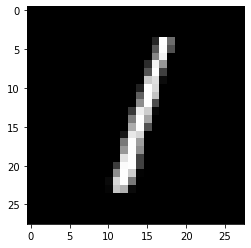

In [ ]:
print("Label:",y_test[2:3])
plt.imshow(x_test[2:3].reshape(28,28), cmap='gray')
plt.show()

#### Note: Images are also considered as numerical matrices

In [ ]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(68, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 68)                2244      
                                                                 
 dense_2 (Dense)             (None, 32)                2208      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 29,902
Trainable params: 29,902
Non-trainable params: 0
_________________________________________________________________


### Design a model

### Weights before Training

Shape of First Layer (784, 32)
Visualization of First Layer


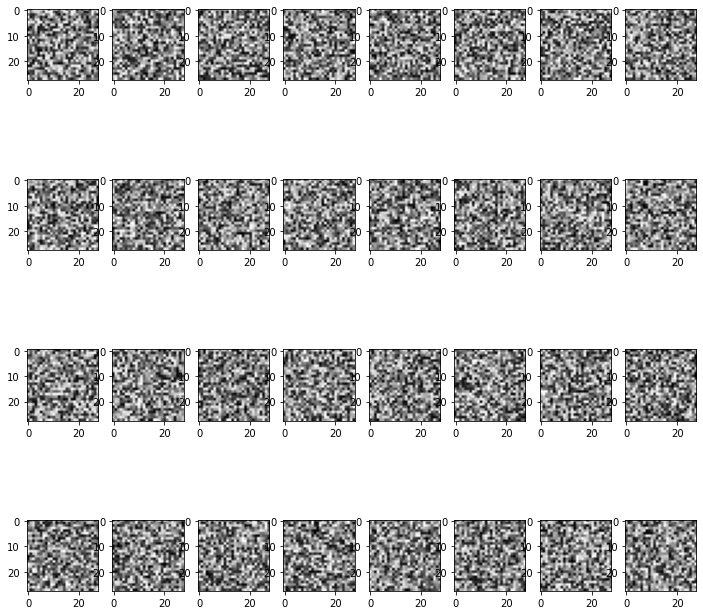

In [ ]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Compiling a Model

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

### Training

In [ ]:
# Write the Training input and output variables,  size of the batch, number of epochs
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=2,
                    verbose=2)

Epoch 1/2
469/469 - 2s - loss: 1.4716 - accuracy: 0.5694 - 2s/epoch - 5ms/step
Epoch 2/2
469/469 - 1s - loss: 0.5696 - accuracy: 0.8576 - 1s/epoch - 3ms/step


### Testing

In [ ]:
# Write the testing input and output variables
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.3931 - accuracy: 0.9003
Test loss: 0.393081933259964
Test accuracy: 0.9003000259399414


### Weights after Training

Shape of First Layer (784, 32)
Visualization of First Layer


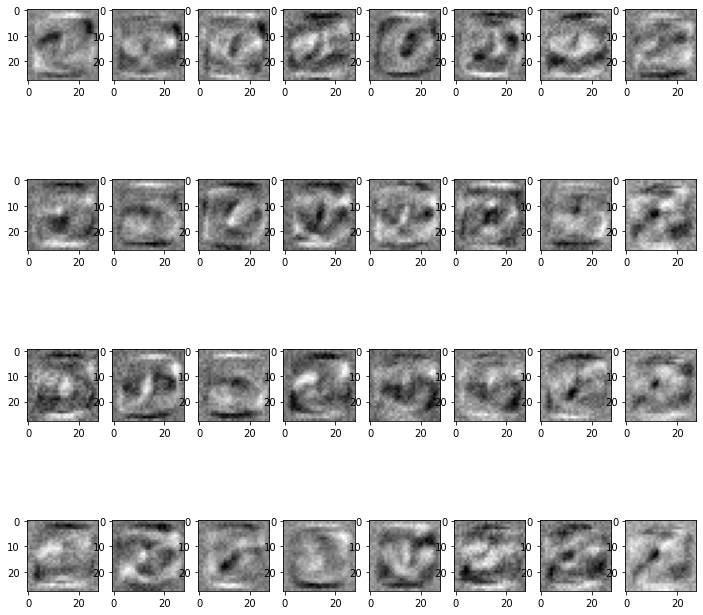

In [ ]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

### Take away
* This internal representation reflects Latent Variables
* Each of the nodes will look for a specific pattern in the input
* A node will get activated if input is similar to the feature it looks for
* Each node is unique and often orthogonal to each other

### Prediction

In [ ]:
# Write the index of the test sample to test
prediction = model.predict(x_test[310:311])
prediction = prediction[0]
print('Prediction\n',prediction)
print('\nThresholded output\n',(prediction>0.5)*1)

1/1 [==============================] - 0s 84ms/step
Prediction
 [9.43859777e-05 2.05637678e-03 1.23613095e-02 9.02862966e-01
 6.72942086e-04 3.55126075e-02 1.45996979e-04 4.50040883e-04
 4.40111756e-02 1.83224387e-03]

Thresholded output
 [0 0 0 1 0 0 0 0 0 0]


### User Input

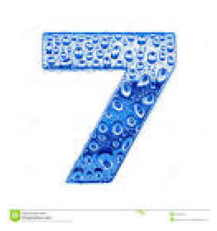

In [ ]:
# Load library
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Load image in color
image_bgr = cv2.imread('/content/index1.jpg', cv2.IMREAD_COLOR)
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

### Convert to grayscale and resize

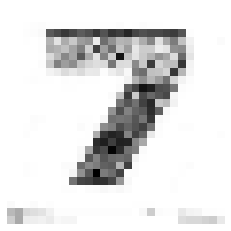

In [ ]:
# Load image as grayscale

# Write the path to the image

image = cv2.imread('/content/index1.jpg', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28)) 
# Show image
plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

### Prediction

In [ ]:
prediction = model.predict(image_resized.reshape(1,784))
print('Prediction Score:\n',prediction[0])
thresholded = (prediction>0.5)*1
print('\nThresholded Score:\n',thresholded[0])
print('\nPredicted Digit:\n',np.where(thresholded == 1)[1][0])

Prediction Score:
 [1.0113582e-02 8.4548003e-05 2.4080876e-02 6.1772877e-01 2.4733291e-04
 3.1672278e-01 1.2644798e-04 3.7511636e-03 2.5881499e-02 1.2629837e-03]

Thresholded Score:
 [0 0 0 1 0 0 0 0 0 0]

Predicted Digit:
 3


# Part 2: Saving, Loading and Retraining Models

### Saving a model

In [ ]:
# serialize model to JSON
model_json = model.to_json()

# Write the file name of the model

with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


### Loading a model

In [ ]:
# load json and create model

# Write the file name of the model

json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
# Write the file name of the weights

loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


### Retraining a model

In [ ]:
loaded_model.compile(loss='categorical_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

history = loaded_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1)
score = loaded_model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 0.3372 - accuracy: 0.9101
Epoch 2/2
469/469 [==============================] - 2s 4ms/step - loss: 0.2641 - accuracy: 0.9274
Test loss: 0.24260136485099792
Test accuracy: 0.9318000078201294


### Saving a model and resuming the training later is the great relief in training large neural networks !

# Part 3: Activation Functions

### Sigmoid Activation Function

In [ ]:
model = Sequential()
model.add(Dense(8, activation='sigmoid', input_shape=(784,)))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 8)                 6280      
                                                                 
 dense_5 (Dense)             (None, 8)                 72        
                                                                 
 dense_6 (Dense)             (None, 10)                90        
                                                                 
Total params: 6,442
Trainable params: 6,442
Non-trainable params: 0
_________________________________________________________________
Epoch 1/2
469/469 [==============================] - 2s 3ms/step - loss: 1.9814 - accuracy: 0.4726 - val_loss: 1.6989 - val_accuracy: 0.5555
Epoch 2/2
469/469 [==============================] - 1s 3ms/step - loss: 1.4786 - accuracy: 0.5803 - val_loss: 1.2896 - val_accuracy: 0.6132
Test loss: 1.2895886898040771
Test

# Part 4: Design Choices in Neural Networks

Tasks for the Lab

Task 1. Lower the  number of layers and compute the test accuracy. Dump the model and weights as a json file.

In [ ]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 32)                25120     
                                                                 
 dense_14 (Dense)            (None, 32)                1056      
                                                                 
 dense_15 (Dense)            (None, 10)                330       
                                                                 
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


Shape of First Layer (784, 32)
Visualization of First Layer


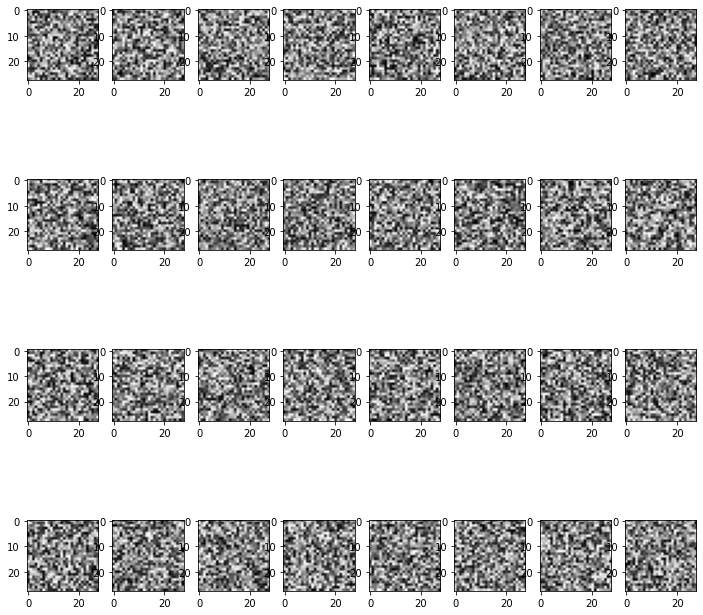

In [ ]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=2,
                    verbose=2)

Epoch 1/2
469/469 - 2s - loss: 1.2746 - accuracy: 0.7176 - 2s/epoch - 4ms/step
Epoch 2/2
469/469 - 1s - loss: 0.4149 - accuracy: 0.8996 - 1s/epoch - 3ms/step


In [ ]:
# Write the testing input and output variables
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 4ms/step - loss: 0.3177 - accuracy: 0.9130
Test loss: 0.31772056221961975
Test accuracy: 0.9129999876022339


In [ ]:
# serialize model to JSON
model1_json = model.to_json()

# Write the file name of the model

with open("model1.json", "w") as json_file:
    json_file.write(model1_json)
    
# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("model1.h5")
print("Saved model to disk")

Saved model to disk


Task 2: Increase the number of layers and compute the test accuracy. Dump the model and weights as a json file. 

In [ ]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(68, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(68, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                25120     
                                                                 
 dense_17 (Dense)            (None, 32)                1056      
                                                                 
 dense_18 (Dense)            (None, 68)                2244      
                                                                 
 dense_19 (Dense)            (None, 32)                2208      
                                                                 
 dense_20 (Dense)            (None, 68)                2244      
                                                                 
 dense_21 (Dense)            (None, 32)                2208      
                                                                 
 dense_22 (Dense)            (None, 10)               

Shape of First Layer (784, 32)
Visualization of First Layer


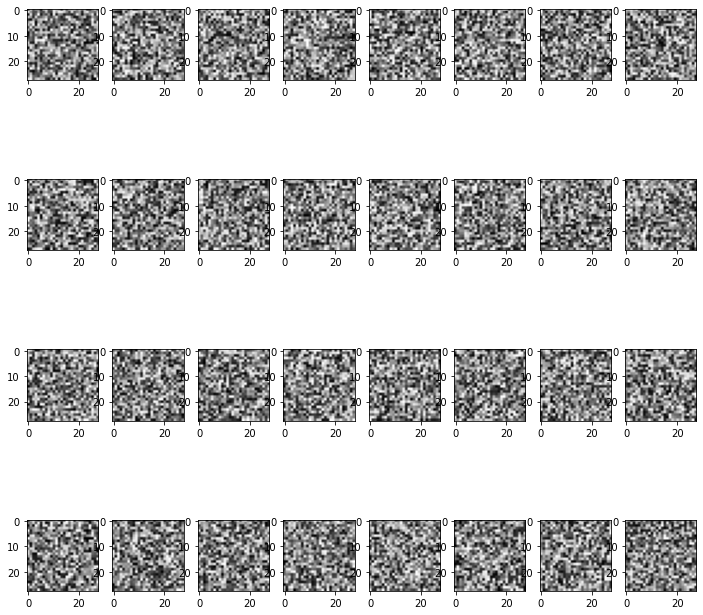

In [ ]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=7,
                    verbose=2)

Epoch 1/7
469/469 - 2s - loss: 0.7783 - accuracy: 0.7067 - 2s/epoch - 5ms/step
Epoch 2/7
469/469 - 2s - loss: 0.7451 - accuracy: 0.7223 - 2s/epoch - 4ms/step
Epoch 3/7
469/469 - 2s - loss: 0.7150 - accuracy: 0.7461 - 2s/epoch - 5ms/step
Epoch 4/7
469/469 - 2s - loss: 0.6698 - accuracy: 0.7728 - 2s/epoch - 5ms/step
Epoch 5/7
469/469 - 2s - loss: 0.6105 - accuracy: 0.7948 - 2s/epoch - 4ms/step
Epoch 6/7
469/469 - 3s - loss: 0.5592 - accuracy: 0.8167 - 3s/epoch - 6ms/step
Epoch 7/7
469/469 - 2s - loss: 0.5081 - accuracy: 0.8511 - 2s/epoch - 4ms/step


In [ ]:
# Write the testing input and output variables
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.4837 - accuracy: 0.8665
Test loss: 0.4836989641189575
Test accuracy: 0.8665000200271606


In [ ]:
# serialize model to JSON
model2_json = model.to_json()

# Write the file name of the model

with open("model2.json", "w") as json_file:
    json_file.write(model2_json)
    
# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("model2.h5")
print("Saved model to disk")

Saved model to disk


Task 3: Play around with different type of activation functions. Dump the model and weights as a json file.

In [ ]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(68, activation='relu'))
model.add(Dense(50, activation='linear'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 32)                25120     
                                                                 
 dense_31 (Dense)            (None, 68)                2244      
                                                                 
 dense_32 (Dense)            (None, 50)                3450      
                                                                 
 dense_33 (Dense)            (None, 10)                510       
                                                                 
Total params: 31,324
Trainable params: 31,324
Non-trainable params: 0
_________________________________________________________________


Shape of First Layer (784, 32)
Visualization of First Layer


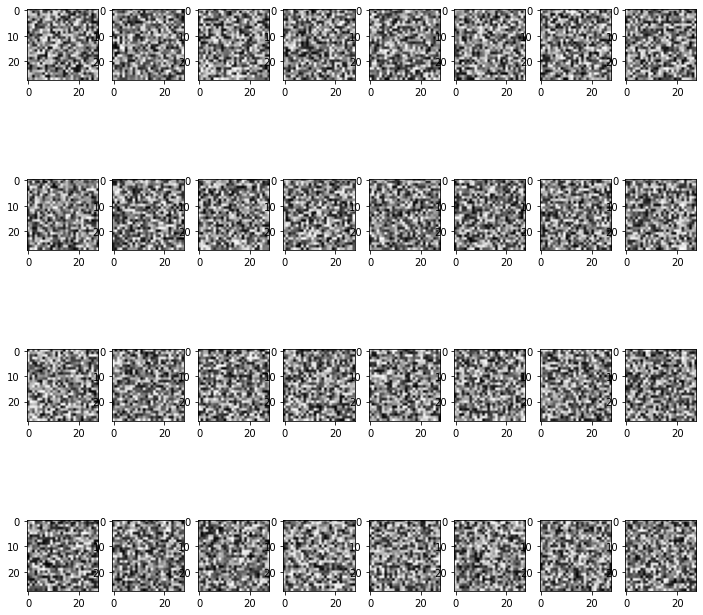

In [ ]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=4,
                    verbose=2)

Epoch 1/4
469/469 - 3s - loss: 0.5755 - accuracy: 0.8409 - 3s/epoch - 7ms/step
Epoch 2/4
469/469 - 1s - loss: 0.2511 - accuracy: 0.9251 - 1s/epoch - 3ms/step
Epoch 3/4
469/469 - 2s - loss: 0.1972 - accuracy: 0.9413 - 2s/epoch - 4ms/step
Epoch 4/4
469/469 - 1s - loss: 0.1643 - accuracy: 0.9511 - 1s/epoch - 3ms/step


In [ ]:
# Write the testing input and output variables
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1599 - accuracy: 0.9509
Test loss: 0.1598540097475052
Test accuracy: 0.9509000182151794


In [ ]:
# serialize model to JSON
model3_json = model.to_json()

# Write the file name of the model

with open("model3.json", "w") as json_file:
    json_file.write(model3_json)
    
# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("model3.h5")
print("Saved model to disk")

Saved model to disk


Task 4. Increase the number of layers and number of neurons in network. Compute the accuracy and dump the model and the weights. 

In [42]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(68, activation='relu'))
model.add(Dense(65, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='linear'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 32)                25120     
                                                                 
 dense_35 (Dense)            (None, 68)                2244      
                                                                 
 dense_36 (Dense)            (None, 65)                4485      
                                                                 
 dense_37 (Dense)            (None, 100)               6600      
                                                                 
 dense_38 (Dense)            (None, 50)                5050      
                                                                 
 dense_39 (Dense)            (None, 10)                510       
                                                                 
Total params: 44,009
Trainable params: 44,009
Non-trai

Shape of First Layer (784, 32)
Visualization of First Layer


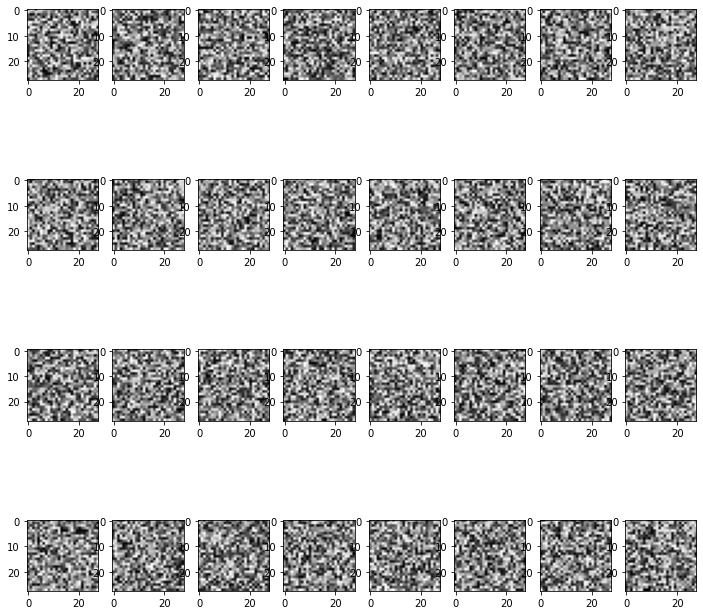

In [43]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [44]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [45]:
history = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=2)

Epoch 1/10
469/469 - 3s - loss: 0.5526 - accuracy: 0.8270 - 3s/epoch - 6ms/step
Epoch 2/10
469/469 - 2s - loss: 0.2620 - accuracy: 0.9192 - 2s/epoch - 4ms/step
Epoch 3/10
469/469 - 2s - loss: 0.1944 - accuracy: 0.9402 - 2s/epoch - 4ms/step
Epoch 4/10
469/469 - 2s - loss: 0.1570 - accuracy: 0.9513 - 2s/epoch - 4ms/step
Epoch 5/10
469/469 - 2s - loss: 0.1351 - accuracy: 0.9583 - 2s/epoch - 5ms/step
Epoch 6/10
469/469 - 2s - loss: 0.1182 - accuracy: 0.9629 - 2s/epoch - 4ms/step
Epoch 7/10
469/469 - 2s - loss: 0.1063 - accuracy: 0.9669 - 2s/epoch - 4ms/step
Epoch 8/10
469/469 - 2s - loss: 0.0963 - accuracy: 0.9698 - 2s/epoch - 4ms/step
Epoch 9/10
469/469 - 2s - loss: 0.0873 - accuracy: 0.9726 - 2s/epoch - 3ms/step
Epoch 10/10
469/469 - 2s - loss: 0.0795 - accuracy: 0.9748 - 2s/epoch - 3ms/step


In [46]:
# Write the testing input and output variables
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1322 - accuracy: 0.9627
Test loss: 0.13224779069423676
Test accuracy: 0.9627000093460083


In [47]:
# serialize model to JSON
model4_json = model.to_json()

# Write the file name of the model

with open("model4.json", "w") as json_file:
    json_file.write(model4_json)
    
# serialize weights to HDF5
# Write the file name of the weights

model.save_weights("model4.h5")
print("Saved model to disk")

Saved model to disk
